###  **Compute the total power and the PSD of noise signal**

Some defintions

1) **Power spectral density (PSD)** is a measure of power per unit frequency, with units in rad^2/Hz or V^2/Hz for phase and amplitude noise respectively. 


2) The **total noise power, P,** is the integrated noise over the whole spectrum. E.g. If we have white noise of PSD α over a frequency band from 0 to 43 kHZ (the SPS revolution frequency). The total noise power would be α*43e3. For a statistical process the total noise power equals the variance (σ^2).


- In our example the noise signal is a sequence of the noise kicks over turns.
- Thererfore, it is a discrete signal over time, $y_n$.
- The signal sampled at discrete times $y_n=y(n \Delta t)$ for a total measurement period of $T=N\Delta T$.
- $1 \leq n \leq N$. In other words N is the length of our signal.

The total noise power is given by:

\begin{equation}
P = \frac{\Delta t}{T} \sum_{n=0}^{N-1} \mid y_n \mid ^2 = \frac{1}{N^2} \sum_{n=0}^{N-1} \mid Y_k \mid ^2 
\end{equation}

where $Y_k$ is the discrete Fourier transform of $y_n$.

Note that in the expressions above the transform $Y_k$ is not in unitary form i.e. not normalised with $1 / \sqrt{N}$. Specifically:

\begin{equation}
Y_k = \sum_{n=0}^{N-1} y_n e^{-\frac{i 2\pi}{N} kn}
\end{equation}

which is also the resuls of the **numpy.fft.fft** function.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Function for creating the noise signal

In [87]:
def create_noise(N, colored=False):        
    if colored: # A.Wolski's method
        phi_0 = 1e-8  # amplitude of noise, aka stdPhaseNoise 
        Delta_psi = 0.18 # the peak of the spectrum

        psi_t_list = []
        psi_t = 0

        # parameters for ksi
        mean = 0.0
        std = 0.04
        for i in range(N):
            psi_t_list.append(psi_t)
            ksi = np.random.normal(mean, std)  # different seed on each turn
            psi_t = psi_t + 2 * np.pi * Delta_psi + 2 * np.pi * ksi

        # Construct the noise signal
        y = phi_0 * np.cos(psi_t_list)
        
    else:
        mu, stdPhaseNoise = 0, 1e-8
        y = np.random.normal(mu, stdPhaseNoise, N)
    
    return y

#### Define sampling parameters

In [88]:
N = 1000 # length of the signal
frev = 43.45e3 # the revolution frequency of SPS
time = np.arange(N)/frev # convert from turns to time

In [89]:
Dt = time[1]-time[0] # sampling (s)

In [90]:
freq = np.linspace(0, N/time[-1], N)

In [91]:
freq[-1]

43493.49349349349

In [92]:
Df = freq[1]-freq[0]

#### To obtain a precise value of PSD, we use the average of 10000 FFTs

In [95]:
fft_list = []
for i in range(10000):
    y_noise = create_noise(N, True)
    fft = np.fft.fft(y_noise)
    fft_list.append(fft)

##### For the computation of the total power the information from one signal and one FFT are enough

In [96]:
# the two methods should give the same due to the Parsheval's theorem
total_power_white = np.sum(y_noise**2)*Dt/time[-1] # rad^2 or V^2 for phase and amplitude noise respectively
total_power_white_fft = np.sum(np.abs(fft)**2)/N**2 # rad^2 or V^2
print(total_power_white)
print(total_power_white_fft)

5.0398811532351346e-17
5.0348412720818983e-17


In [78]:
# The variance of the signal should be equal to the total noise power
np.var(y_noise)

1.0307894953377441e-16

In [79]:
mean_dft = np.mean(np.abs(fft_list)**2, axis=0)
PSD = mean_dft/(Df*N**2)

Text(0, 0.5, 'PSD (rad$^2$/Hz)')

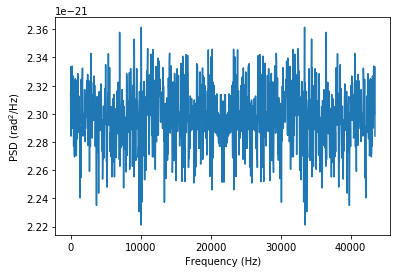

In [80]:
plt.plot(freq, PSD)
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (rad'+r'$^2$'+'/Hz)')

### Find the PSD at the betatron frequency

In [81]:
vb = 0.18 * frev # Hz
print(vb)

7821.0


In [82]:
# Find closest value in a list
def closest(lst, K):
    return lst[min(range(len(lst)), key=lambda i: abs(lst[i] - K))]

In [83]:
closest_vb_in_f = closest(list(freq), vb)

In [84]:
PSD_vb_index = [i for i in range(len(freq)) if freq[i] == closest_vb_in_f]
PSD_vb = PSD[PSD_vb_index]

In [85]:
PSD_vb_index

[180]

In [86]:
PSD_vb

array([2.28234477e-21])